In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("Top Movies.csv")
data.head(5)

,id,Movie Name,Release Date,Production Budget (USD),Domestic Gross (USD),Worldwide Gross (USD),Domestic Box Office (USD),International Box Office (USD),Worldwide Box Office (USD),Est. Domestic DVD Sales (USD),...,Production Method,Creative Type,Production/Financing Companies,Production Countries,Languages,Domestic Releases,International Releases,Theater counts,Domestic Share Percentage,Movie URL
0,1,Star Wars Ep. VII: The Force Awakens,2015-12-16,533200000,936662225,2056046835,936662225.0,1.119385e+09,2.056047e+09,39601100.0,...,"Animation,Live Action",Science Fiction,"Lucasfilm,Bad Robot",United States,English,"December 18th, 2015 (IMAX) byWalt DisneyDecemb...","December 16th, 2015 (Wide) (Belgium)December 1...","4,134 opening theaters/4,134 max. theaters, 9....",45.6,https://www.the-numbers.com/movie/Star-Wars-Ep...
1,2,Avatar: The Way of Water,2022-12-09,460000000,684075767,2315589775,684075767.0,1.631514e+09,2.315590e+09,7771432.0,...,"Animation,Live Action",Science Fiction,"Lightstorm Entertainment,20th Century Studios,...",United States,English,"December 16th, 2022 (Wide) by20th Century Stud...","December 9th, 2022 (Wide) (Finland)December 14...","4,202 opening theaters/4,340 max. theaters, 11...",29.5,https://www.the-numbers.com/movie/Avatar-The-W...
2,3,Indiana Jones and the Dial of Destiny,2023-06-28,402300000,174480468,383963057,174480468.0,2.094826e+08,3.839631e+08,NaN,...,Live Action,Historical Fiction,"Lucasfilm,Walt Disney Pictures,Paramount Pictures",United States,English,"June 30th, 2023 (Wide) byWalt DisneyJune 30th,...","June 28th, 2023 (Wide) (Australia)June 28th, 2...","4,600 opening theaters/4,600 max. theaters, 4....",45.4,https://www.the-numbers.com/movie/Indiana-Jone...
3,4,Avengers: Endgame,2019-04-23,400000000,858373000,2748242781,858373000.0,1.889870e+09,2.748243e+09,23961293.0,...,"Animation,Live Action",Super Hero,Marvel Studios,United States,English,"April 26th, 2019 (Wide) byWalt DisneyApril 26t...","April 23rd, 2019 (Limited) (China)April 24th, ...","4,662 opening theaters/4,662 max. theaters, 8....",31.2,https://www.the-numbers.com/movie/Avengers-End...
4,5,Mission: Impossible—The Final Reckoning,2025-05-21,400000000,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Mission-Impo...


In [ ]:
data.shape

(6569, 32)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     6569 non-null   object 
 1   Movie Name                             6569 non-null   object 
 2   Release Date                           6420 non-null   object 
 3   Production Budget (USD)                6569 non-null   int64  
 4   Domestic Gross (USD)                   6569 non-null   int64  
 5   Worldwide Gross (USD)                  6569 non-null   int64  
 6   Domestic Box Office (USD)              5847 non-null   float64
 7   International Box Office (USD)         5044 non-null   float64
 8   Worldwide Box Office (USD)             5044 non-null   float64
 9   Est. Domestic DVD Sales (USD)          2566 non-null   float64
 10  Est. Domestic Blu-ray Sales (USD)      2156 non-null   float64
 11  Tota

In [ ]:
data.describe()

,Production Budget (USD),Domestic Gross (USD),Worldwide Gross (USD),Domestic Box Office (USD),International Box Office (USD),Worldwide Box Office (USD),Est. Domestic DVD Sales (USD),Est. Domestic Blu-ray Sales (USD),Total Est. Domestic Video Sales (USD),Opening Weekend (USD),Legs,Infl. Adj. Dom. BO (USD),Running Time (minutes),Domestic Share Percentage
count,6.569000e+03,6.569000e+03,6.569000e+03,5.847000e+03,5.044000e+03,5.044000e+03,2.566000e+03,2.156000e+03,2.750000e+03,5.396000e+03,5561.000000,5.638000e+03,5752.000000,5847.000000
mean,3.301912e+07,4.249764e+07,9.451553e+07,4.774534e+07,6.774495e+07,1.201200e+08,1.689014e+07,7.812575e+06,2.188510e+07,1.355373e+07,5.778554,8.004659e+07,108.799200,62.507149
std,4.507580e+07,7.314075e+07,1.879960e+08,7.589244e+07,1.347470e+08,2.076215e+08,3.060324e+07,1.525850e+07,3.751239e+07,2.335250e+07,21.860752,1.235171e+08,20.563929,30.025441
min,8.600000e+01,0.000000e+00,0.000000e+00,2.640000e+02,1.700000e+01,1.700000e+01,3.060000e+03,7.240000e+02,7.240000e+02,2.400000e+01,1.000000,2.510000e+02,9.000000,0.000000
25%,5.000000e+06,1.083350e+06,3.771345e+06,4.237802e+06,2.223474e+06,1.179753e+07,1.920015e+06,7.874272e+05,2.431747e+06,2.290962e+05,2.530000,6.529432e+06,95.000000,39.600000
50%,1.700000e+07,1.620479e+07,2.734225e+07,2.156785e+07,1.881376e+07,4.628658e+07,7.271108e+06,2.379845e+06,9.488031e+06,6.256853e+06,3.340000,3.629675e+07,105.000000,59.800000
75%,4.000000e+07,5.187238e+07,9.762872e+07,5.804631e+07,6.999998e+07,1.370919e+08,1.939742e+07,7.657140e+06,2.516179e+07,1.633832e+07,5.260000,1.007226e+08,119.000000,97.600000
max,5.332000e+08,9.366622e+08,2.923706e+09,9.366622e+08,2.138484e+09,2.923706e+09,3.700262e+08,2.224846e+08,4.325350e+08,3.571150e+08,998.330000,1.771490e+09,262.000000,100.000000


In [ ]:
data.isnull().sum()

,0
id,0
Movie Name,0
Release Date,149
Production Budget (USD),0
Domestic Gross (USD),0
Worldwide Gross (USD),0
Domestic Box Office (USD),722
International Box Office (USD),1525
Worldwide Box Office (USD),1525
Est. Domestic DVD Sales (USD),4003


In [ ]:
data.dropna()

,id,Movie Name,Release Date,Production Budget (USD),Domestic Gross (USD),Worldwide Gross (USD),Domestic Box Office (USD),International Box Office (USD),Worldwide Box Office (USD),Est. Domestic DVD Sales (USD),...,Production Method,Creative Type,Production/Financing Companies,Production Countries,Languages,Domestic Releases,International Releases,Theater counts,Domestic Share Percentage,Movie URL
0,1,Star Wars Ep. VII: The Force Awakens,2015-12-16,533200000,936662225,2056046835,936662225.0,1.119385e+09,2.056047e+09,39601100.0,...,"Animation,Live Action",Science Fiction,"Lucasfilm,Bad Robot",United States,English,"December 18th, 2015 (IMAX) byWalt DisneyDecemb...","December 16th, 2015 (Wide) (Belgium)December 1...","4,134 opening theaters/4,134 max. theaters, 9....",45.6,https://www.the-numbers.com/movie/Star-Wars-Ep...
1,2,Avatar: The Way of Water,2022-12-09,460000000,684075767,2315589775,684075767.0,1.631514e+09,2.315590e+09,7771432.0,...,"Animation,Live Action",Science Fiction,"Lightstorm Entertainment,20th Century Studios,...",United States,English,"December 16th, 2022 (Wide) by20th Century Stud...","December 9th, 2022 (Wide) (Finland)December 14...","4,202 opening theaters/4,340 max. theaters, 11...",29.5,https://www.the-numbers.com/movie/Avatar-The-W...
3,4,Avengers: Endgame,2019-04-23,400000000,858373000,2748242781,858373000.0,1.889870e+09,2.748243e+09,23961293.0,...,"Animation,Live Action",Super Hero,Marvel Studios,United States,English,"April 26th, 2019 (Wide) byWalt DisneyApril 26t...","April 23rd, 2019 (Limited) (China)April 24th, ...","4,662 opening theaters/4,662 max. theaters, 8....",31.2,https://www.the-numbers.com/movie/Avengers-End...
6,7,Avengers: Age of Ultron,2015-04-22,365000000,459005868,1395316979,459005868.0,9.363111e+08,1.395317e+09,36065408.0,...,"Animation,Live Action",Super Hero,Marvel Studios,United States,English,"May 1st, 2015 (Wide) byWalt DisneyMay 1st, 201...","April 22nd, 2015 (Wide) (Finland)April 22nd, 2...","4,276 opening theaters/4,276 max. theaters, 7....",32.9,https://www.the-numbers.com/movie/Avengers-Age...
7,8,Fast X,2023-05-17,340000000,146126015,714375114,146126015.0,5.682491e+08,7.143751e+08,4701025.0,...,Live Action,Contemporary Fiction,"Universal Pictures,Original Film,One Race Film...",United States,English,"May 19th, 2023 (Wide) byUniversalMay 19th, 202...","May 17th, 2023 (Wide) (Belgium)May 17th, 2023 ...","4,046 opening theaters/4,088 max. theaters, 4....",20.5,https://www.the-numbers.com/movie/Fast-X-(2023...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,"5,933",Unfriended,2015-04-17,1000000,32789645,64364198,32789645.0,3.157455e+07,6.436420e+07,2768879.0,...,Live Action,Fantasy,"Bazelevs Company,Blumhouse",United States,English,"April 17th, 2015 (Wide) byUniversal","April 30th, 2015 (Wide) (Australia)May 1st, 20...","2,739 opening theaters/2,775 max. theaters, 3....",50.9,https://www.the-numbers.com/movie/Unfriended#t...
5947,"5,948",Unfriended: Dark Web,2018-07-19,1000000,8866745,16434588,8866745.0,7.567843e+06,1.643459e+07,66062.0,...,Live Action,Contemporary Fiction,"Bazelevs Company,BH Tilt,Blumhouse",United States,English,"July 20th, 2018 (Wide) byOTL Releasing","July 19th, 2018 (Wide) (Singapore)August 8th, ...","1,546 opening theaters/1,547 max. theaters, 2....",54.0,https://www.the-numbers.com/movie/Unfriended-D...
5984,"5,985",The Act of Killing,2013-04-10,1000000,486919,1227316,486919.0,7.403970e+05,1.227316e+06,1074084.0,...,Live Action,Factual,"Final Cut For Real,Spring Films LTD,Media Prog...","Denmark,Norway,United Kingdom",English,"July 19th, 2013 (Limited) byDrafthouse Films","April 10th, 2013 (Wide) (France)November 14th,...","1 opening theaters/29 max. theaters, 7.5 weeks...",39.7,https://www.the-numbers.com/movie/Act-of-Killi...
6078,"6,079",Searching,2018-08-23,880000,26015149,75636047,26015149.0,4.962090e+07,7.563605e+07,180814.0,...,Live Action,Contemporary Fiction,"Bazelevs Company,Screen Gems,Stage 6 Fil

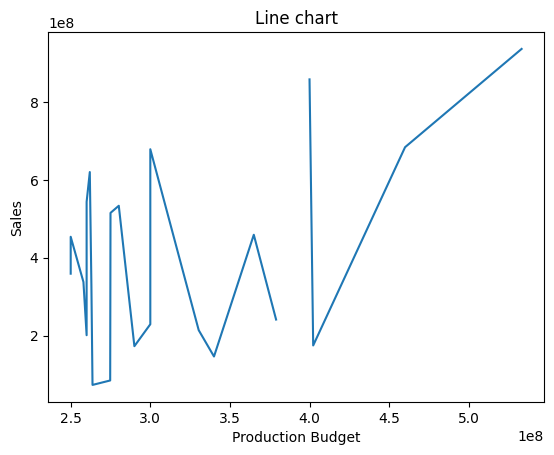

In [ ]:
x_vals,y_vals=data[['Production Budget (USD)']].head(25),data[['Domestic Box Office (USD)']].head(25)
plt.plot(x_vals,y_vals)
plt.xlabel("Production Budget")
plt.ylabel("Sales")
plt.title("Line chart")
plt.show()

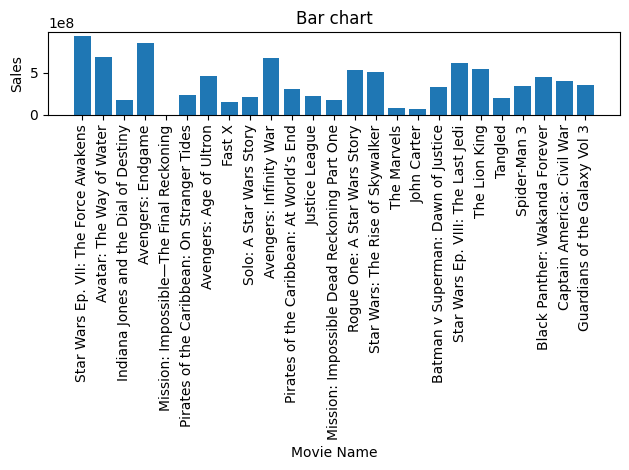

In [ ]:
x_vals,y_vals=data['Movie Name'].head(25),data['Domestic Box Office (USD)'].head(25)
plt.bar(x_vals.tolist(),y_vals)
plt.xlabel("Movie Name")
plt.ylabel("Sales")
plt.title("Bar chart")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['id', 'Movie Name', 'Release Date', 'Production Budget (USD)',
       'Domestic Gross (USD)', 'Worldwide Gross (USD)',
       'Domestic Box Office (USD)', 'International Box Office (USD)',
       'Worldwide Box Office (USD)', 'Est. Domestic DVD Sales (USD)',
       'Est. Domestic Blu-ray Sales (USD)',
       'Total Est. Domestic Video Sales (USD)', 'Opening Weekend (USD)',
       'Legs', 'Infl. Adj. Dom. BO (USD)', 'Video Release', 'MPAA Rating',
       'Running Time (minutes)', 'Franchise', 'Keywords', 'Source', 'Genre',
       'Production Method', 'Creative Type', 'Production/Financing Companies',
       'Production Countries', 'Languages', 'Domestic Releases',
       'International Releases', 'Theater counts', 'Domestic Share Percentage',
       'Movie URL'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


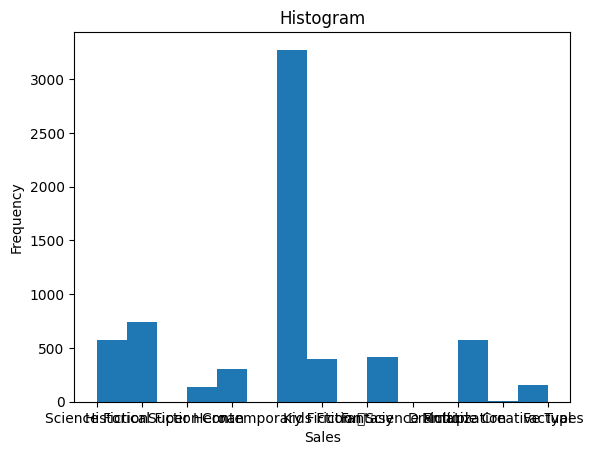

In [ ]:
plt.hist(data['Creative Type'].astype(str),bins=15)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


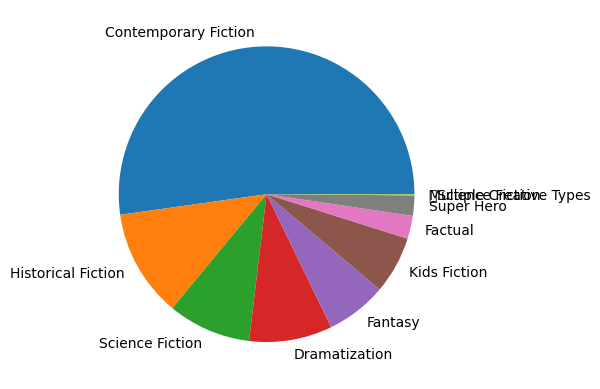

In [ ]:
values = data['Creative Type'].value_counts()
names = values.index
plt.pie(values, labels=names)
plt.show()

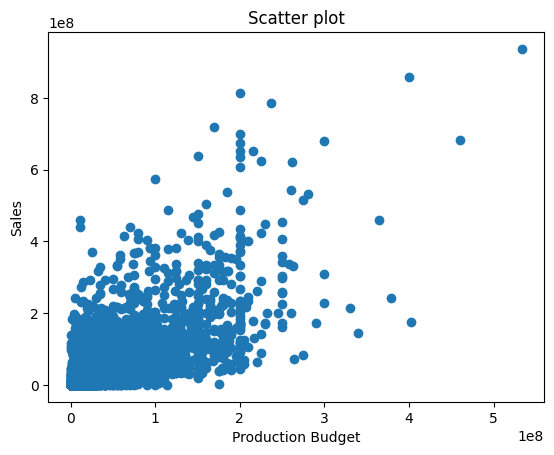

In [ ]:
plt.scatter(data['Production Budget (USD)'],data['Domestic Box Office (USD)'])
plt.xlabel("Production Budget")
plt.ylabel("Sales")
plt.title("Scatter plot")
plt.show()

In [ ]:
data=pd.read_csv("Top Movies.csv")
data=data[['Worldwide Gross (USD)','Domestic Gross (USD)']]
data=data.dropna()
scaling=MinMaxScaler()
data_scaled=scaling.fit_transform(data)
data_scaled=pd.DataFrame(data_scaled)
data_scaled

,0,1
0,7.032331e-01,1.000000
1,7.920050e-01,0.730333
2,1.313275e-01,0.186279
3,9.399860e-01,0.916417
4,0.000000e+00,0.000000
...,...,...
6564,8.225690e-05,0.000052
6565,4.576383e-07,0.000001
6566,0.000000e+00,0.000000
6567,6.192175e-05,0.000193


In [ ]:
scaling_data=StandardScaler().fit_transform(data)
scaling_data=pd.DataFrame(scaling_data)
scaling_data

,0,1
0,10.434694,12.226189
1,11.815376,8.772496
2,1.539765,1.804642
3,14.116946,11.155717
4,-0.502791,-0.581083
...,...,...
6564,-0.501512,-0.580420
6565,-0.502784,-0.581065
6566,-0.502791,-0.581083
6567,-0.501828,-0.578608


In [ ]:
data=pd.read_csv("Top Movies.csv")
encoded_data = LabelEncoder().fit_transform(data['Production Budget (USD)'].head(15))
encoded_data = pd.DataFrame(encoded_data)
encoded_data

,0
0,11
1,10
2,9
3,8
4,8
5,7
6,6
7,5
8,4
9,3


In [ ]:
temp_data=np.array(data['Creative Type'].head(10)).reshape(1,-1)
encoded_data = OneHotEncoder().fit_transform(temp_data)
print(encoded_data)

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0


In [ ]:
temp_data=pd.DataFrame({'Creative_Type': data['Creative Type'].head(10)})
encoded_data = pd.get_dummies(temp_data)
print(encoded_data)

   Creative_Type_Contemporary Fiction  Creative_Type_Historical Fiction  \
0                               False                             False   
1                               False                             False   
2                               False                              True   
3                               False                             False   
4                               False                             False   
5                               False                              True   
6                               False                             False   
7                                True                             False   
8                               False                             False   
9                               False                             False   

   Creative_Type_Science Fiction  Creative_Type_Super Hero  
0                           True                     False  
1                           True                    

NameError: name 'rplt' is not defined

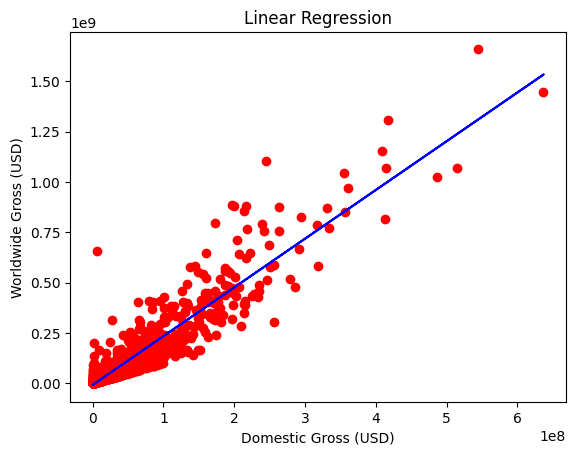

In [ ]:
X=data[['Domestic Gross (USD)']]
y = data['Worldwide Gross (USD)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.xlabel("Domestic Gross (USD)")
plt.ylabel("Worldwide Gross (USD)")
plt.title("Linear Regression")
rplt.show

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 3982195640514111.0
R2 Score: 0.872223851735662


DMDW 5

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
data = pd.read_csv("california_housing_test.csv")
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
x,y=data.drop('median_house_value',axis=1),data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     22500.0       0.00      0.00      0.00         1
     40000.0       0.00      0.00      0.00         1
     41500.0       0.00      0.00      0.00         1
     42500.0       0.00      0.00      0.00         1
     44600.0       0.00      0.00      0.00         1
     46300.0       0.00      0.00      0.00         1
     46500.0       0.00      0.00      0.00         1
     47500.0       0.00      0.00      0.00         2
     50800.0       0.00      0.00      0.00         1
     52500.0       0.00      0.00      0.00         1
     52600.0       0.00      0.00      0.00         2
     55000.0       0.00      0.00      0.00         2
     55400.0       0.00      0.00      0.00         1
     57700.0       0.00      0.00      0.00         1
     58200.0       0.00      0.00      0.00         1
     58300.0       0.00      0.00      0.00         0
     59000.0       0.00      0.00      0.00         1
     60000.0       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
model_RF=RandomForestClassifier()
param_grid = {
    'n_estimators': [10,50,100],'max_depth': [None,10,20]
}
grid_search=GridSearchCV(model_RF,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100]})

In [ ]:
print("best parameters:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

best parameters: {'max_depth': 10, 'n_estimators': 100}
best score: 0.043333333333333335
